legi: 20-945-721

# SLT-CE-3: Histogram Clustering

In this coding exercise, you will segment an image with histogram clustering (HC). You will implement two different methods: maximum a posterior probability (MAP) and deterministic annealing (DA) for predicting the cluster membership for each pixel.

<h2 style="background-color:#f0b375;"> References </h2>

[1] Histogram clustering for unsupervised image segmentation: http://ieeexplore.ieee.org/document/784981 

[2] Lecture Slides 5: https://ml2.inf.ethz.ch/courses/slt/lectures/slt21_lecture05.pdf

[3] Lecture script: https://ml2.inf.ethz.ch/courses/slt/tutorials/SLT_Script.pdf, chapter 2.7

<h2 style="background-color:#f0b375;"> Setup </h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
from HC import HistogramClustering
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # suppress skimage warning 

## Texture and corresponding label map
(This texture is used to fit your model.)

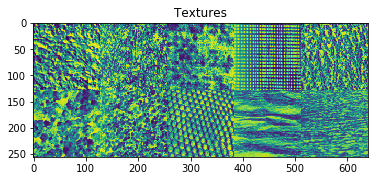

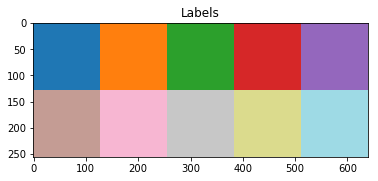

In [2]:
texture = imread("texture.png")

patch_grid_shape = (2, 5)
patch_shape = (128, 128)
label_map = np.ones(texture.shape)

for patch in range(np.prod(patch_grid_shape)):
    i, j = np.unravel_index(patch, patch_grid_shape)
    label_map[patch_shape[0] * i:patch_shape[0] * (i + 1), \
              patch_shape[1] * j:patch_shape[1] * (j + 1)] = np.ravel_multi_index((i, j), patch_grid_shape)

plt.imshow(texture)
plt.title("Textures")
plt.figure()
plt.imshow(label_map, cmap="tab20")
plt.title("Labels")
plt.show()

## Permuted texture and label map
(The permuted texture is used for the prediction)

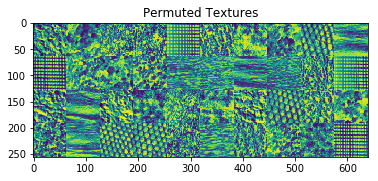

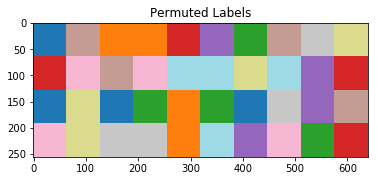

In [3]:
perm_patch_grid_shape = tuple(i * 2 for i in patch_grid_shape)
perm_patch_shape = tuple(i // 2 for i in patch_shape)
n_perm_patches = np.prod(patch_grid_shape) * 4

np.random.seed(5)
perm = np.random.permutation(n_perm_patches)

perm_texture = np.ones(texture.shape)
perm_label_map = np.ones(texture.shape)

for patch, perm_patch in enumerate(perm):
    i, j = np.unravel_index(patch, perm_patch_grid_shape) * np.array(perm_patch_shape)
    ip, jp = np.unravel_index(perm_patch, perm_patch_grid_shape) * np.array(perm_patch_shape)

    perm_texture[ip:ip + perm_patch_shape[0], jp:jp + perm_patch_shape[1]] \
        = texture[i:i + perm_patch_shape[0], j:j + perm_patch_shape[1]]

    perm_label_map[ip:ip + perm_patch_shape[0], jp:jp + perm_patch_shape[1]] \
        = label_map[i:i + perm_patch_shape[0], j:j + perm_patch_shape[1]]

plt.imshow(perm_texture)
plt.title("Permuted Textures")
plt.figure()
plt.imshow(perm_label_map, cmap="tab20")
plt.title("Permuted Labels")
plt.show()

<h2 style="background-color:#f0b375;">
Section 4.0 
<span style=font-size:50%> Complete all problems in this section to get a pass on this exercise. </span>
</h2>

<p style="background-color:#adebad;">
    Read the references and recapitulate the parameter estimation formulas for both: maximum a posteriori probability estimation (MAP) and Deterministic Annealing (DA) estimation. In particular, write down how equation (5) in reference <a href=http://ieeexplore.ieee.org/document/784981>[1]</a> looks for the case of DA (using the notation of reference [1]).<br>
Hint: try to derive $\hat P(y|c)$ from $\hat P(c|x)$ and use the maximum entropy principle to find $\hat P(c|x)$.
</p>

### Maximum a posteriori

$$\hat{p}(x) = \dfrac{n(x)}{\sum_{x'} n(x')}$$

$$\hat{p}(y|c) = \sum_{x:\hat{c}(x)=c} \dfrac{n(x)}{\sum_{x':\hat{c}(x')=c} n(x')} \hat{p}(y|x)$$

$$\hat{c}(x) = argmin_a \{ - \sum_{y \in \mathcal{Y}} \hat{p}(y|x) \log{\hat{p}(y|a)}\} \; \text{with uniform prior} \; p(c)$$


### Deterministic Annealing

$$p(c(x)=a|\hat{\theta})= \dfrac{\exp{\Big(-\dfrac{h(a,x;\hat{\theta})}{T}\Big)}}{\sum_{b=1}^{K}\exp{\Big(-\dfrac{h(b,x;\hat{\theta})}{T}\Big)}}$$

$$h(a,x;\hat{\theta}) = n(x) D_{KL} \Big[ \hat{p}(.|x) || \hat{p}(.|a)\Big]$$

$$\hat{p}(y|c) = \dfrac{\sum_{x} p(c|\hat{\theta},x) \hat{p}(y|x)}{\sum_{x} p(c|\hat{\theta},x)}$$

<p style="background-color:#adebad;">
Implement the "MAP" part of the <b>fit method</b> for the template class HistogramClustering, according to the contract outlined in its docstring. You can add more class methods if necessary. Create an instance of your HC class with n_clusters = 10 and fit the image texture. Record the execution time.
</p>

In [25]:
%%time
HC = HistogramClustering()
HC.fit(texture)
check_is_fitted(HC, ["p_yc"])

CPU times: user 40.1 s, sys: 1min 3s, total: 1min 43s
Wall time: 1min 44s


<h2 style="background-color:#f0b375;">
Section 4.5 
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 4.5 </span>
</h2>

<p style="background-color:#adebad;">
    <ul style="background-color:#adebad;">
        <li> Implement the <b>predict method</b> for the template class HC, according to the contract outlined in its docstring.
        </li>        
        <li>
            Use HC.predict to predict the texture labels of perm_texture. Plot the predicted label map.
        </li>
    </ul>
</p>

In [26]:
%%time
predicted_perm_label_map = HC.predict(perm_texture)

CPU times: user 11.3 s, sys: 1.98 s, total: 13.3 s
Wall time: 13.5 s


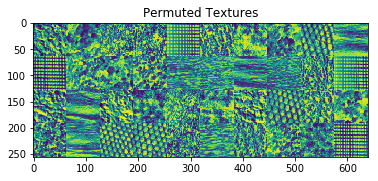

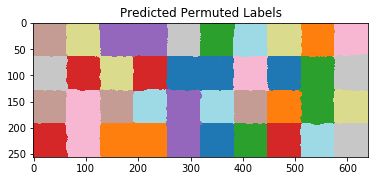

In [27]:
# Plot of predicted label map

plt.imshow(perm_texture)
plt.title("Permuted Textures")
plt.figure()
plt.imshow(predicted_perm_label_map, cmap="tab20")
plt.title("Predicted Permuted Labels")
plt.show()

<p style="background-color:#adebad;">
    Plot the confusion matrix for your predictions, using the perm_label_map. Make sure to permute the texture labels appropriately, to make them correspond to the true labels (see Hungarian algortihm to find the best match).
</p>

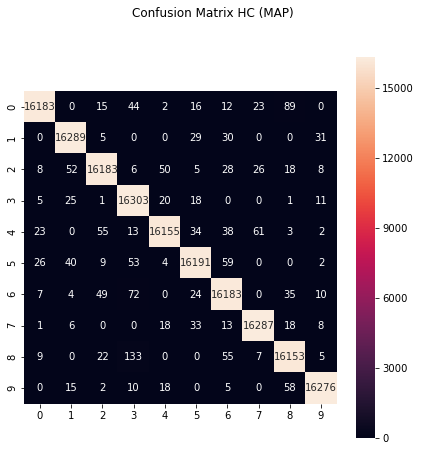

In [7]:
transformed_pred = HC.transform_prediction(predicted_perm_label_map, perm_label_map) # permute labels
cmat = confusion_matrix( perm_label_map.flatten(), transformed_pred.flatten())
fig, axes = plt.subplots(figsize=(7,7))
fig.suptitle("Confusion Matrix HC (MAP)")
sns.heatmap(cmat, annot=True, fmt='d',ax=axes, square=True, annot_kws={"size":10})
plt.show()

<p style="background-color:#adebad;">
    Using n_clusters=10, fit HC with all combinations of n_bins = 16, 32, 64 and window_size = 7, 9, 11.
    For each setting compute the accuracy of the prediction on perm_texture. Show the results in a 3x3 matrix and label the axes properly.
</p>

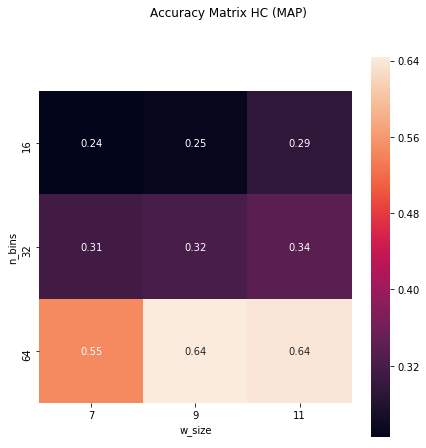

CPU times: user 2min 49s, sys: 45.7 s, total: 3min 34s
Wall time: 3min 34s


In [8]:
%%time
# 3x3 Matrix with accuracy scores of the different parameter combination
n_bins = [16,32,64]
w_size = [7,9,11]
acc_matrix = np.zeros((len(n_bins), len(w_size)))
predictions = []

for b in n_bins:
    for w in w_size:
        HC_ = HistogramClustering(window_size=w,n_bins=b)
        HC_.fit(texture)
        pred = HC_.predict(perm_texture)
        transformed_pred = HC_.transform_prediction(pred, perm_label_map)
        acc_matrix[n_bins.index(b)][w_size.index(w)] = accuracy_score(perm_label_map.flatten(), transformed_pred.flatten())
        predictions.append(transformed_pred)
        
# plot matrix
fig, axes = plt.subplots(figsize=(7,7))
fig.suptitle("Accuracy Matrix HC (MAP)")
sns.heatmap(acc_matrix, annot=True, fmt='.2g', square=True, annot_kws={"size":10}, yticklabels=n_bins, xticklabels=w_size)
axes.set_xlabel("w_size")
axes.set_ylabel("n_bins")
plt.show()

<p style="background-color:#adebad;">
    For each setting plot the prediction (i.e. the clustering) of the texture (perm_texture) itself. Arrange the plots next to each other in a grid and label them accordingly.
    </p>

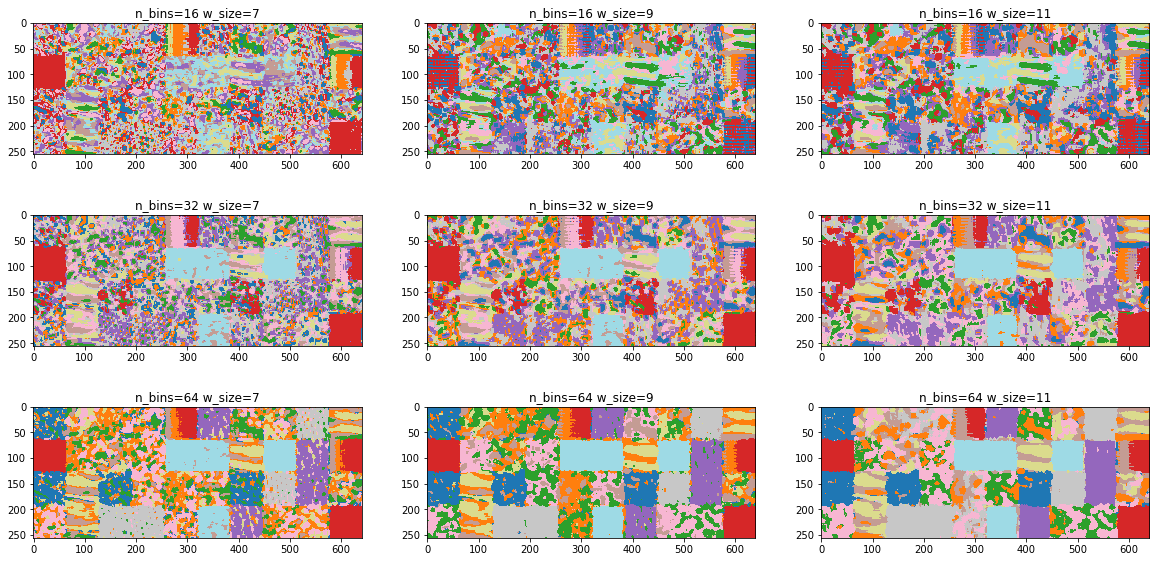

In [9]:
# Cluster predictions (9 plots arranged in a 3x3 grid)
fig, axes = plt.subplots(len(n_bins),len(w_size),figsize=(20,10))

for b in n_bins:
    for w in w_size:
        b_index = n_bins.index(b)
        w_index = w_size.index(w)
        index = len(n_bins)*b_index + w_index
        axes[b_index][w_index].imshow(predictions[index], cmap="tab20")
        axes[b_index][w_index].grid(False)
        axes[b_index][w_index].set_title("n_bins=" + str(b) + " w_size=" + str(w))

<h2 style="background-color:#f0b375;">
Section 5 
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 5 </span>
</h2>

<ul style="background-color:#adebad;">
        <li> Implement the <b>generate</b> method for the template class HC, according to the contract outlined in its docstring.
        </li>
        <li>
        Use HC.generate to generate ten 128x128 patches, one for each texture. Plot the generated textures next to the ground truth textures.
        </li>
    </ul>

In [10]:
%%time
HC = HistogramClustering(n_bins=32)
HC.fit(texture)
c_map = HC._compute_cluster_mapping(HC.cluster_probs.flatten(), label_map.flatten())

CPU times: user 11.1 s, sys: 3.71 s, total: 14.8 s
Wall time: 14.1 s


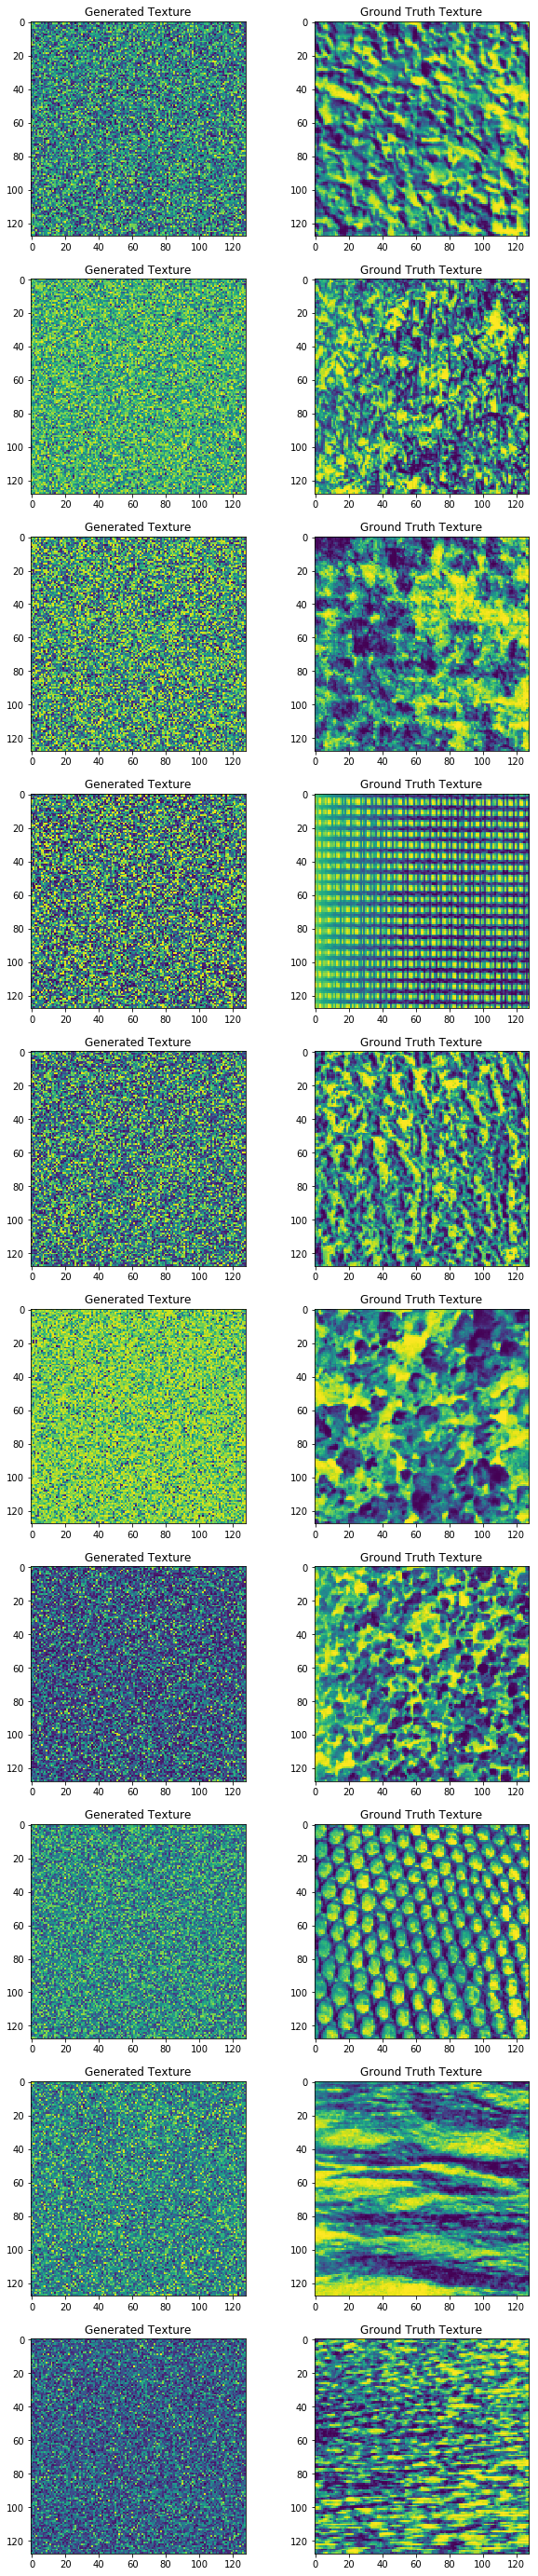

In [11]:
# Generate Textures
fig, axes = plt.subplots(HC.n_clusters,2, figsize=(10,50))
patches = np.hstack([texture[:128], texture[128:]]).reshape(128, 10, 128)

for c in range(HC.n_clusters):
    C = np.ones(patch_shape) * c_map[c]
    X = HC.generate(C)
    axes[c][0].imshow(X)
    axes[c][0].set_title("Generated Texture")
    axes[c][1].imshow(patches[:,c,:])
    axes[c][1].set_title("Ground Truth Texture")


<h2 style="background-color:#f0b375;">
Section 5.5 
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 5.5 </span>
</h2>

<ul style="background-color:#adebad;">
    <li>
        Use k-means clustering to cluster the pixels of the texture (perm_texture). Set n_clusters=10, and use the local histogram vectors as features. Compare the predicted label map with k-means with the predicted label map obtained by HC.
    </li>
</ul>

In [12]:
%%time
# Fit MAP
HC = HistogramClustering()
HC.fit(texture)
predicted_perm_label_map = HC.predict(perm_texture)
transformed_pred = HC.transform_prediction(predicted_perm_label_map, perm_label_map) 

CPU times: user 49.7 s, sys: 1min, total: 1min 50s
Wall time: 1min 50s


In [13]:
%%time
# Fit K-Means
kmeans = KMeans(n_clusters=10)
kmeans.fit(HC.p_yx.reshape(-1,HC.n_bins))
kmeans_perm = kmeans.predict(HC._compute_histograms(perm_texture).reshape(-1,HC.n_bins)).reshape(256,640)
kmeans_transformed_pred = HC.transform_prediction(kmeans_perm, perm_label_map)

CPU times: user 1min 23s, sys: 11.4 s, total: 1min 35s
Wall time: 31.5 s


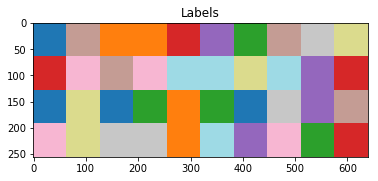

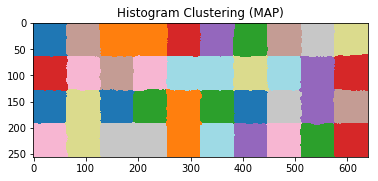

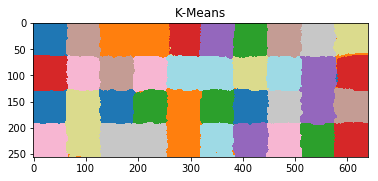

In [14]:
# Compare Labels 
plt.imshow(perm_label_map, cmap="tab20")
plt.title("Labels")
plt.figure()
plt.imshow(transformed_pred, cmap="tab20")
plt.title("Histogram Clustering (MAP)")
plt.show()
plt.imshow(kmeans_transformed_pred, cmap="tab20")
plt.title("K-Means")
plt.show()


<ul style="background-color:#adebad;">
    <li>
        Plot and compare the confusion matrices for both, k-means, and HC.
    </li>
</ul>

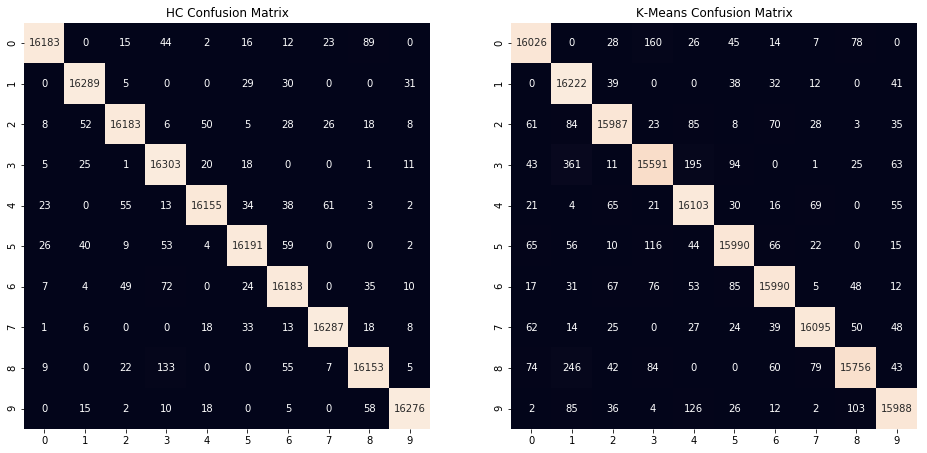

In [15]:
# Confusion matrices
cmat_hc = confusion_matrix(perm_label_map.flatten(), transformed_pred.flatten())
cmat_kmeans = confusion_matrix( perm_label_map.flatten(), kmeans_transformed_pred.flatten())

fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].set_title("HC Confusion Matrix")
sns.heatmap(cmat_hc, annot=True, fmt='d',ax=axes[0], square=True, annot_kws={"size":10}, cbar=False)
axes[1].set_title("K-Means Confusion Matrix")
sns.heatmap(cmat_kmeans, annot=True, fmt='d',ax=axes[1], square=True, annot_kws={"size":10}, cbar=False)

plt.show()

<ul style="background-color:#adebad;">
        <li>
Plot the centroid histograms $\hat P(y|c)$ after fitting the texture image, one centroid histogram for every texture image. Compare them to the empirical histograms (i.e. show them both in one plot).
        </li>
    </ul>

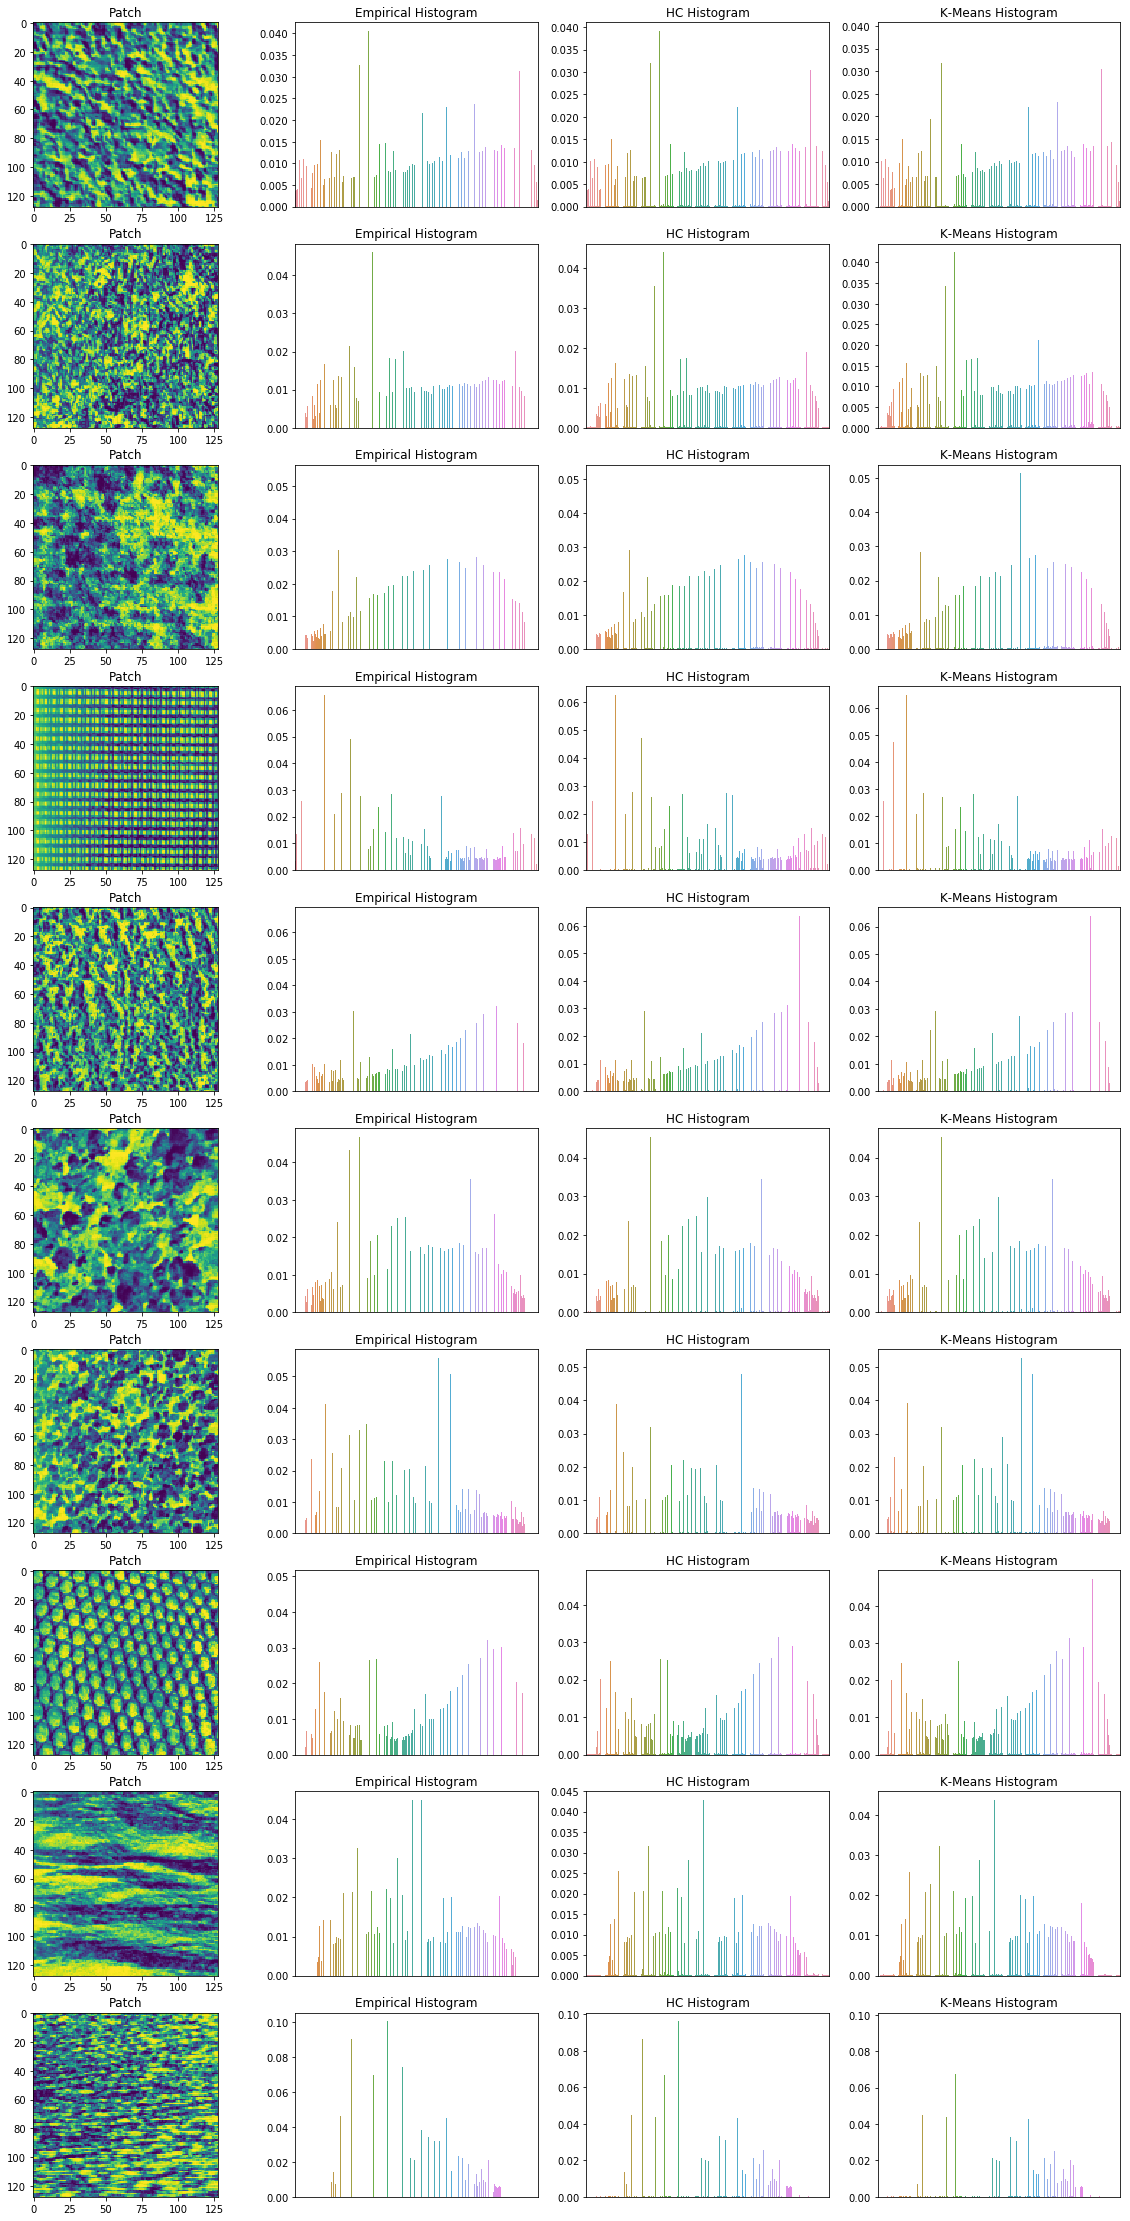

In [16]:
# Histograms
c_map_hc = list(HC._compute_cluster_mapping(HC.cluster_probs.flatten(), label_map.flatten()))
c_map_kmeans = list(HC._compute_cluster_mapping(kmeans.predict(HC.p_yx.reshape(-1,HC.n_bins)), label_map.flatten()))
                                           
fig, axes = plt.subplots(HC.n_clusters,4,figsize=(20,40))
for c in range(HC.n_clusters):
        axes[c][0].imshow(patches[:,c,:])
        axes[c][0].set_title("Patch")
        patch_histogram = np.histogram(patches[:,c,:], bins=np.linspace(0,1,HC.n_bins+1))[0]
        patch_histogram = patch_histogram/patch_histogram.sum()
        sns.barplot(y=patch_histogram, x= [i for i in range(HC.n_bins)], ax=axes[c,1], ci=None)
        axes[c,1].set_title("Empirical Histogram")
        axes[c,1].set_xticks([])
        sns.barplot(y=HC.p_yc[c_map_hc.index(c)], x= [i for i in range(HC.n_bins)], ax=axes[c,2], ci=None)
        axes[c,2].set_title("HC Histogram")
        axes[c,2].set_xticks([])
        sns.barplot(y= kmeans.cluster_centers_[c_map_kmeans.index(c)], x= [i for i in range(HC.n_bins)], ax=axes[c,3], ci=None)
        axes[c,3].set_title("K-Means Histogram")
        axes[c,3].set_xticks([])


<h2 style="background-color:#f0b375;">
Section 6.0 
<span style=font-size:50%> Complete all problems in this and previous sections to get a grade of 6.0 </span>
</h2>

<ul style="background-color:#adebad;">
        <li>
        Implement the "DA" part of HC.fit.
        </li>
    </ul>

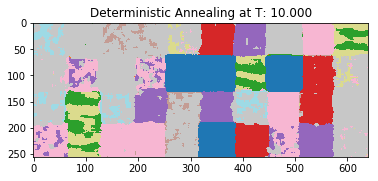

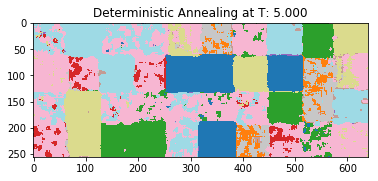

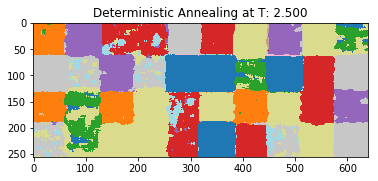

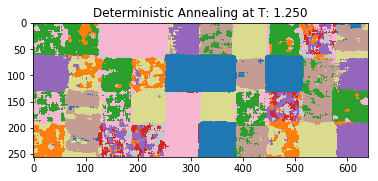

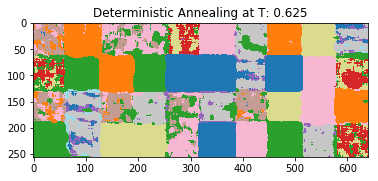

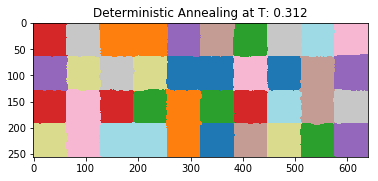

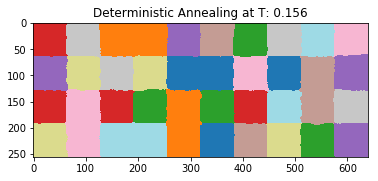

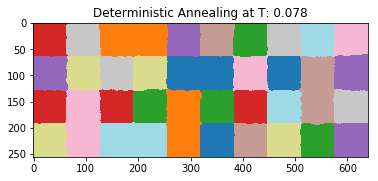

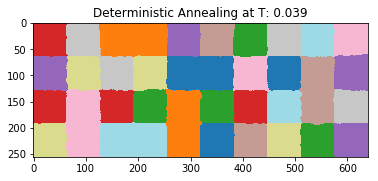

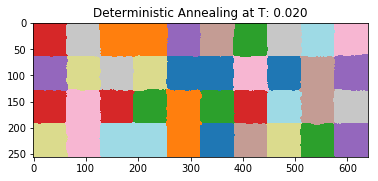

CPU times: user 8min 13s, sys: 10min 44s, total: 18min 58s
Wall time: 11min 2s


In [17]:
%%time
HC = HistogramClustering(estimation="DA", x_test=perm_texture)
HC.fit(texture)
check_is_fitted(HC, ["p_yc"])

<ul style="background-color:#adebad;">
        <li>
        Plot the clustering (predicted labels) of the texture (perm_texture) at different temperatures during the annealing schedule. Describe what you observe.
        </li>
    </ul>

We plot the predicted labels for each temperature T during annealing.

We can observe how the number of "open" clusters gradually increases as the temperature decreases. At the very beginning almost all patches are assigned to one cluster. Gradually, we recognize more and more clusters until the end where the algorithm predicts all clusters correctly.

## Comments

We hope you found this exercise instructive.

Feel free to leave comments below, we will read them carefully.